In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image,display, HTML
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Uber Request Data

In [164]:
df =  pd.read_csv('Uber Request Data.csv')

In [165]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [166]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [168]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [169]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [170]:
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [171]:
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [172]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [173]:
df.shape # This indicates that it has 6745 rows and 6 columns

(6745, 6)

In [174]:
df.shape[1]

6

In [175]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

#This converts the object data type into data and time object which is used to calculated time durations and helps in group them on the basis of time intervals

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [177]:
df.Status.value_counts()   #This tell us the total status of the trip wheter its completed or not completed or cancelled 

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [178]:
df['trip_duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60


df['is_completed'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)

completed_trips_by_date = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1D')).agg({'is_completed': 'sum', 'trip_duration': 'mean'})

# Find the date with the highest number of completed trips and the mean of completed trip duration on that date
max_completed_trips_date = completed_trips_by_date['is_completed'].idxmax()
max_completed_trips = completed_trips_by_date['is_completed'].max()
mean_trip_duration = completed_trips_by_date.loc[max_completed_trips_date, 'trip_duration']

print("The date with the most completed trips is:", max_completed_trips_date)
print("The number of completed trips on that date is:", max_completed_trips)
print("The mean of completed trip duration on that date is:", mean_trip_duration)


The date with the most completed trips is: 2016-11-07 00:00:00
The number of completed trips on that date is: 601
The mean of completed trip duration on that date is: 1372.5707154742097


In [179]:
df.shape  # AS we can see that the column has been increased in the data because we added two more columns to it

(6745, 8)

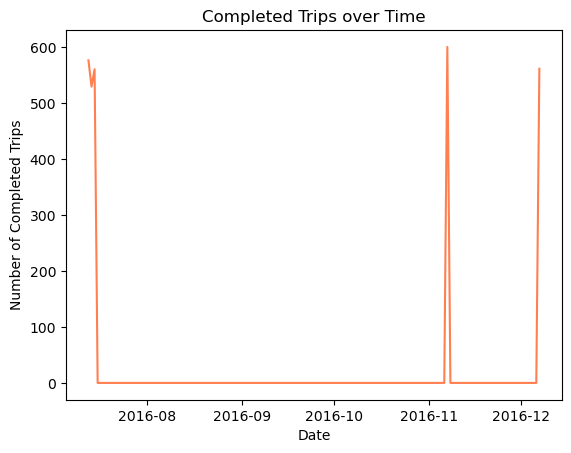

In [180]:
completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1H')).sum()['is_completed']

completed_trips_by_day = completed_trips_by_hour.resample('D').sum()

sns.lineplot(x=completed_trips_by_day.index, y=completed_trips_by_day.values , color = 'coral')
plt.xlabel('Date')
plt.ylabel('Number of Completed Trips')
plt.title('Completed Trips over Time')

plt.show()



In [181]:
df['trip_duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

df['is_completed'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)

completed_trips_by_hour = df[df['is_completed'] == 1].groupby(pd.Grouper(key='Request timestamp', freq='1H')).sum()['is_completed']

max_completed_trips = completed_trips_by_hour.max()
max_completed_trips_date = completed_trips_by_hour.idxmax()

print("The highest number of completed trips within a 24-hour period is:", max_completed_trips)
print("The date when the highest number of completed trips occurred is:", max_completed_trips_date)

The highest number of completed trips within a 24-hour period is: 47
The date when the highest number of completed trips occurred is: 2016-11-07 09:00:00


In [182]:

start_time = max_completed_trips_date
end_time = start_time + pd.Timedelta(hours=24)
completed_trips_period = df[(df['is_completed'] == 1) & (df['Request timestamp'] >= start_time) & (df['Request timestamp'] < end_time)]

completed_trips_by_driver = completed_trips_period.groupby('Driver id')['is_completed'].sum()

top_drivers = completed_trips_by_driver.sort_values(ascending=False).head(3)

print("Top drivers with the highest number of completed trips during the 24-hour period when the highest number of completed trips occurred:")
print(top_drivers)

Top drivers with the highest number of completed trips during the 24-hour period when the highest number of completed trips occurred:
Driver id
67.0     4
296.0    4
178.0    4
Name: is_completed, dtype: int64


In [183]:
print(completed_trips_by_driver)

Driver id
1.0      2
3.0      2
4.0      1
5.0      2
7.0      2
        ..
295.0    2
296.0    4
297.0    1
299.0    1
300.0    1
Name: is_completed, Length: 246, dtype: int64


In [184]:
#These are the top drivers who completed the highest number of trips during a 24-hour period:

#Driver id 67 completed 4 trips
#Driver id 296 completed 4 trips
#Driver id 178 completed 4 trips

In [185]:
df["Request hour"] = df["Request timestamp"].dt.hour
df.head()

#Here we added one more column to the data as request hour

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,trip_duration,is_completed,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,69.000000,1,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,50.000000,1,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,41.000000,1,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,55.000000,1,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.516667,1,8


The hour with the most requests during the two week period is: 18


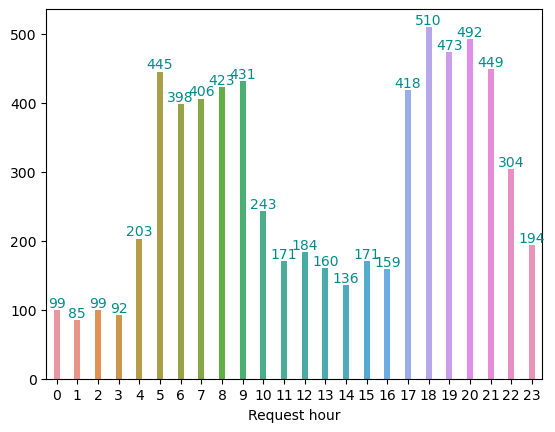

In [186]:
requests_by_hour = df.groupby('Request hour')['Request id'].count()


max_requests_hour = requests_by_hour.idxmax()

print("The hour with the most requests during the two week period is:", max_requests_hour)


requests_by_hour = requests_by_hour.sort_index()


top_3 = requests_by_hour.sort_values(ascending=False)


ax = sns.barplot(x=requests_by_hour.index, y=requests_by_hour.values,width = 0.3)


for hour, freq in top_3.iteritems():
    plt.text(hour, freq, str(freq), ha='center', va='bottom', color="darkcyan")

In [187]:
#Inference:
    #The highest peak hours for requests occurred in the evening from 6-8 PM.
    #The hour with the most requests during the two week period was 6 PM, with 510 requests.
    #The second highest peak hour was 8 PM with 492 requests.
    #The third highest peak hour was 7 PM with 473 requests.

In [188]:
df['Day of Week'] = df['Request timestamp'].dt.day_name()

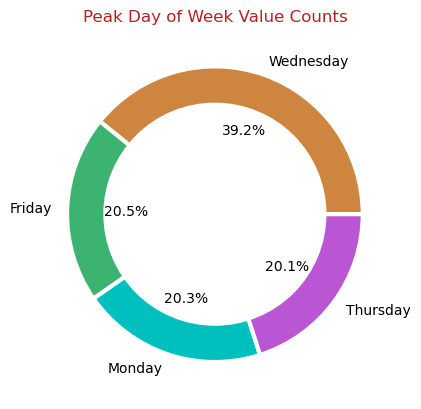

In [189]:
day_counts = df['Day of Week'].value_counts()

colors = ["peru","mediumseagreen","c","mediumorchid"]

plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%',colors=colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })


cricle = plt.Circle(xy=(0,0), radius = 0.75, color = 'white')
plt.gcf()
plt.gca().add_artist(cricle)

plt.title('Peak Day of Week Value Counts',color = 'firebrick')

plt.show()

In [190]:
#The peak number of requests on a particular day are as follows:

#Wednesday with 2644 requests
#Friday with 1381 requests
#Monday with 1367 requests
#Thursday with 1353 requests

In [191]:
cancelled_df = df[df['Status'] == 'Cancelled']
no_cars_available_df = df[df['Status'] == 'No Cars Available']

cancelled_counts = cancelled_df['Day of Week'].value_counts()
no_cars_available_counts = no_cars_available_df['Day of Week'].value_counts()

print("Cancelled counts by day of week:\n", cancelled_counts)
print("\nNo Cars Available counts by day of week:\n", no_cars_available_counts)

Cancelled counts by day of week:
 Wednesday    510
Monday       262
Thursday     252
Friday       240
Name: Day of Week, dtype: int64

No Cars Available counts by day of week:
 Wednesday    995
Friday       580
Thursday     571
Monday       504
Name: Day of Week, dtype: int64


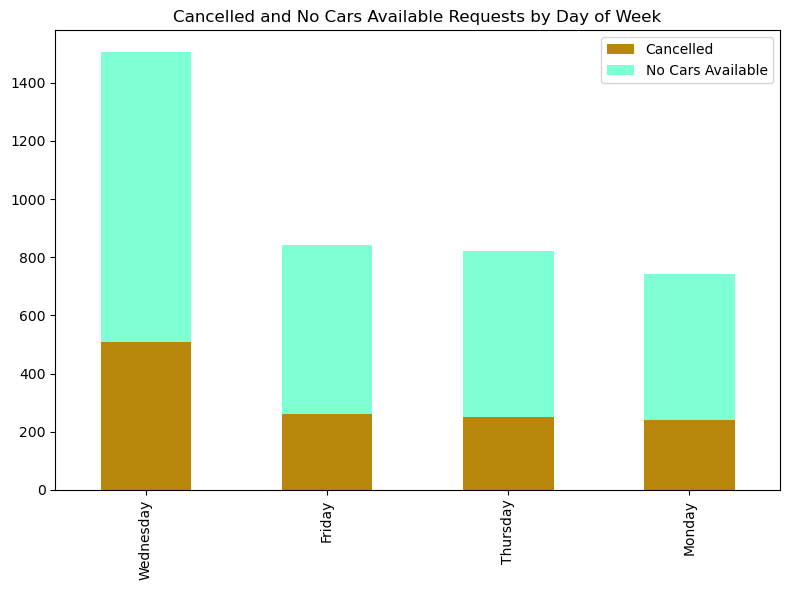

In [192]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(111)

cancelled_counts.plot(kind='bar', ax=ax1, color='darkgoldenrod', label='Cancelled')

no_cars_available_counts.plot(kind='bar', ax=ax1, bottom=cancelled_counts, color='aquamarine', label='No Cars Available')

plt.title('Cancelled and No Cars Available Requests by Day of Week')
plt.legend()


plt.tight_layout()
plt.show()

In [193]:
#Here are the counts of cancelled and unfulfilled requests by day of the week:

#Cancelled counts:

#Wednesday: 510
#Monday: 262
#Thursday: 252
#Friday: 240

#No Cars Available counts:

#Wednesday: 995
#Friday: 580
#Thursday: 571
#Monday: 504


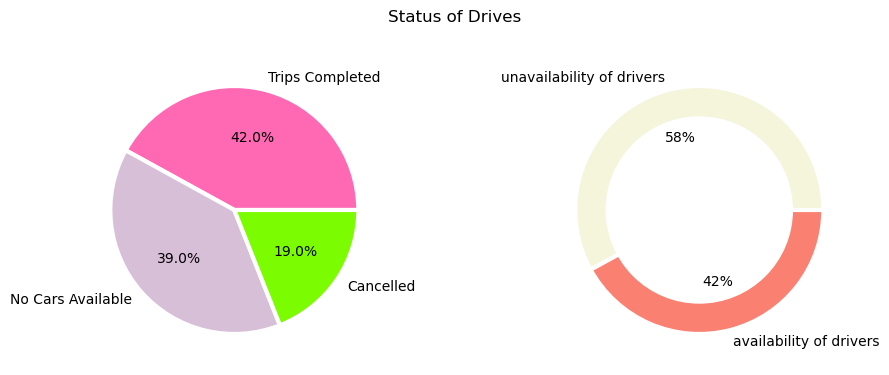

In [194]:
labels = ['Trips Completed', 'No Cars Available', 'Cancelled']
sizes = [42,39,19]


labels2 = ['unavailability of drivers', 'availability of drivers']
sizes2 = [58,42]
colors2 = ['beige', 'salmon']

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize = (10,10))

ax1.pie(sizes,labels=labels ,autopct='%1.1f%%',colors={"lawngreen","hotpink","thistle"}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })


ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

cricle = plt.Circle(xy=(0,0), radius = 0.75, color = 'white')
plt.gcf()
plt.gca().add_artist(cricle)


fig.suptitle('Status of Drives')

plt.subplots_adjust(top=1.45)
plt.subplots_adjust(wspace=0.5)




plt.show()

In [195]:
# 42% were completed successfully
# 39% were unfulfilled due to unavailability of cars
# 19% were cancelled by either the rider or the driver.
# The unavailability of drivers is a significant issue, as it accounts for 58% of the time.

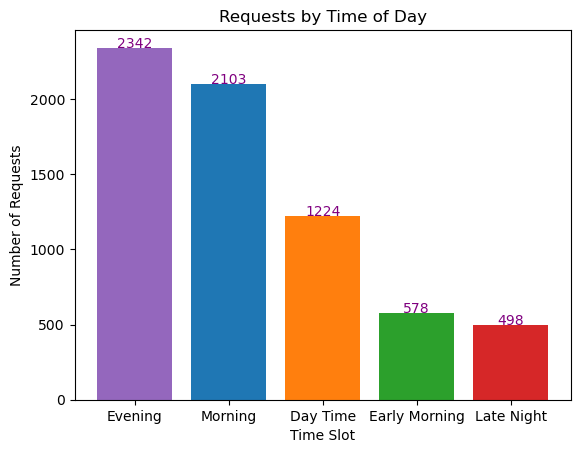

In [196]:
def get_time_period(hour):
    if hour < 5:
        return "Early Morning"
    elif 5 <= hour < 10:
        return "Morning"
    elif 10 <= hour < 17:
        return "Day Time"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Late Night"

df['Time slot'] = df['Request hour'].apply(get_time_period)
time_slot_counts = df['Time slot'].value_counts()

plt.bar(time_slot_counts.index, time_slot_counts.values,color={"#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"})
plt.title("Requests by Time of Day")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")


for i, v in enumerate(time_slot_counts.values):
    plt.text(i, v, str(v), ha='center',color = '#800080')
    

plt.show()

In [197]:
#The highest rush hours are in the evening with 2342 requests, followed by the morning with 2342 requests.
#The least rush time is late night with only 498 requests

# Uber trip Purpose Data

In [198]:
 uber_data = pd.read_csv('My Uber Drives - 2016.csv')

In [199]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [200]:
uber_data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [201]:
uber_data['PURPOSE*']=uber_data['PURPOSE*'].replace(to_replace=np.nan,value='Missing_record')

In [202]:
uber_data.isna().sum()

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

In [203]:
uber_data.dropna(inplace = True)

In [204]:
uber_data.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [205]:
uber_data = uber_data.rename(columns={'START_DATE*': 'Start_Date','END_DATE*':'End_date','CATEGORY*':'Category'})
uber_data = uber_data.rename(columns={'START*': 'Start','STOP*':'Stop','MILES*':'Miles','PURPOSE*':'Purpose'})

In [206]:
uber_data.head()

,Start_Date,End_date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Missing_record
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [207]:
uber_data.duplicated().sum()

1

In [208]:
uber_data.drop_duplicates(inplace=True)

In [209]:
uber_data.Purpose.value_counts()

Missing_record     502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: Purpose, dtype: int64

In [210]:
uber_data.Category.value_counts()

Business    1077
Personal      77
Name: Category, dtype: int64

In [211]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start_Date  1154 non-null   object 
 1   End_date    1154 non-null   object 
 2   Category    1154 non-null   object 
 3   Start       1154 non-null   object 
 4   Stop        1154 non-null   object 
 5   Miles       1154 non-null   float64
 6   Purpose     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [212]:
uber_data['Start_Date'] = pd.to_datetime(uber_data['Start_Date'])

In [213]:
uber_data['End_date'] = pd.to_datetime(uber_data['End_date'])

In [214]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  1154 non-null   datetime64[ns]
 1   End_date    1154 non-null   datetime64[ns]
 2   Category    1154 non-null   object        
 3   Start       1154 non-null   object        
 4   Stop        1154 non-null   object        
 5   Miles       1154 non-null   float64       
 6   Purpose     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [215]:
uber_data['Month']=uber_data['End_date'].dt.month_name()
uber_data['Day']=uber_data['End_date'].dt.day_name()

In [216]:
pivot_Day =pd.pivot_table(data=uber_data,index='Day',values='Category',aggfunc='count')
pivot_Day

,Category
Day,
Friday,203
Monday,175
Saturday,150
Sunday,151
Thursday,154
Tuesday,172
Wednesday,149


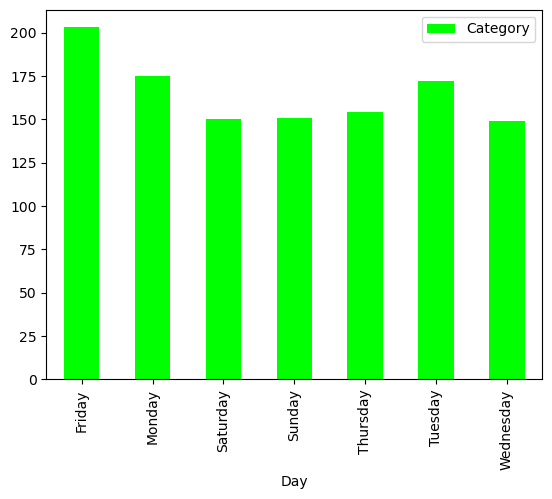

In [217]:


pivot_Day.plot.bar(color= 'lime')

plt.show()


In [218]:
pivot_Month =pd.pivot_table(data=uber_data,index='Month',values='Category',aggfunc='count')
pivot_Month

,Category
Month,
April,54
August,133
December,146
February,115
January,61
July,112
June,107
March,113
May,49


<Axes: ylabel='Month'>

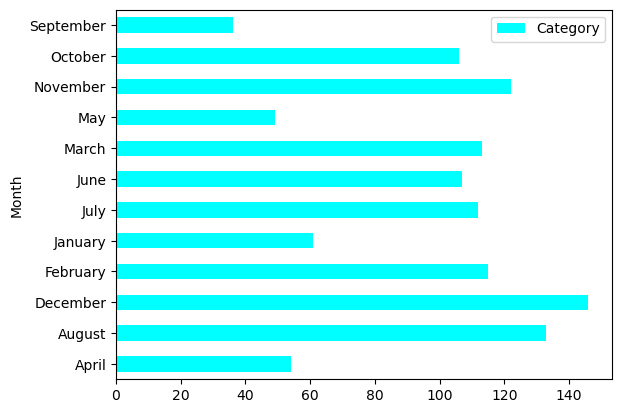

In [219]:
pivot_Month.plot.barh(color ='cyan')

In [220]:
uber_data['Miles'].describe()

count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: Miles, dtype: float64

<Axes: >

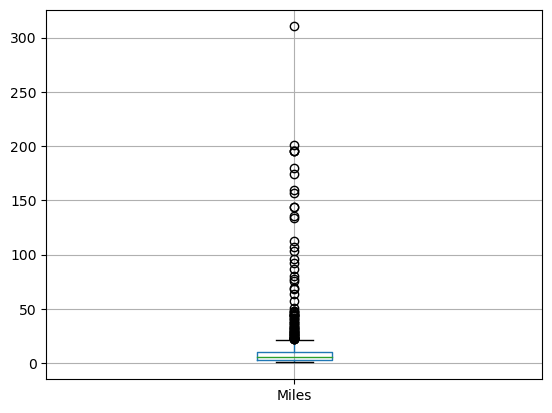

In [221]:
uber_data.boxplot()

In [222]:
def remove(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [223]:
lowertime, uppertime = remove(uber_data["Miles"])
uber_data["Miles"] = np.where(uber_data["Miles"]>uppertime,uppertime,uber_data["Miles"])
uber_data["Miles"] = np.where(uber_data["Miles"]<lowertime,lowertime,uber_data["Miles"])

<Axes: >

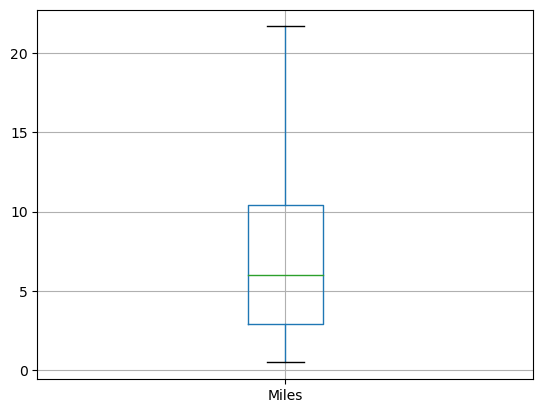

In [224]:
uber_data.boxplot()

<Axes: xlabel='Miles', ylabel='Day'>

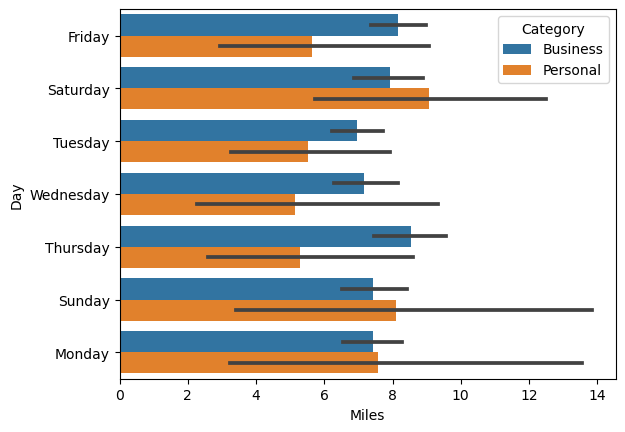

In [225]:
sns.barplot(x="Miles",y="Day",hue= "Category",data=uber_data)

<Axes: xlabel='Category', ylabel='count'>

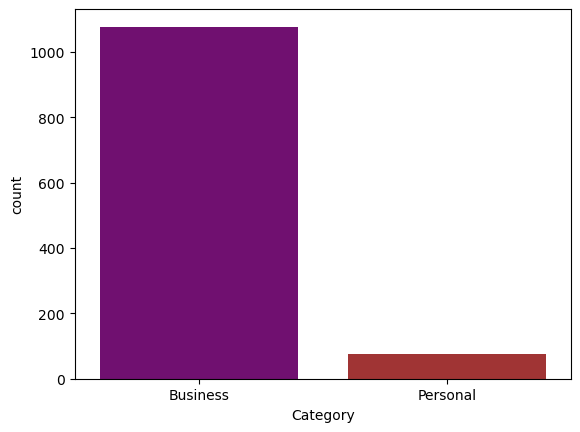

In [226]:
colors = ['purple','firebrick']
sns.countplot(x='Category',data = uber_data,palette=colors)

In [227]:
Purpose_mails = uber_data.groupby('Purpose').mean()
Purpose_mails

,Miles
Purpose,
Airport/Travel,5.500000
Between Offices,9.969444
Charity ($),15.100000
Commute,21.650000
Customer Visit,10.358911
Errand/Supplies,3.963672
Meal/Entertain,5.527500
Meeting,10.791398
Missing_record,7.149104


In [228]:
Purpose_mails = uber_data.groupby('Purpose').mean()
Purpose_mails

,Miles
Purpose,
Airport/Travel,5.500000
Between Offices,9.969444
Charity ($),15.100000
Commute,21.650000
Customer Visit,10.358911
Errand/Supplies,3.963672
Meal/Entertain,5.527500
Meeting,10.791398
Missing_record,7.149104


<Axes: ylabel='Purpose'>

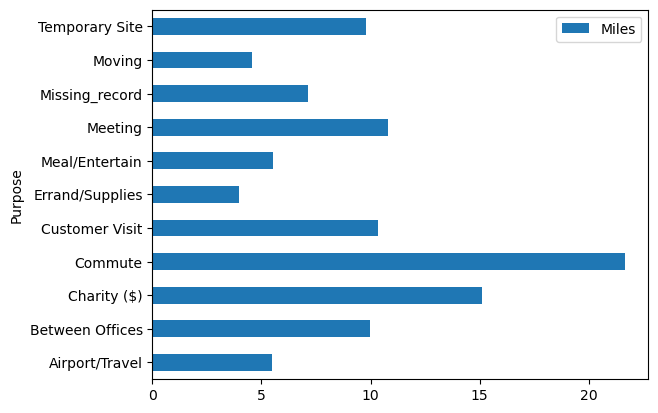

In [229]:
Purpose_mails.plot.barh()

In [230]:
Pur_mails=Purpose_mails.reset_index()
Pur_mails

,Purpose,Miles
0,Airport/Travel,5.500000
1,Between Offices,9.969444
2,Charity ($),15.100000
3,Commute,21.650000
4,Customer Visit,10.358911
5,Errand/Supplies,3.963672
6,Meal/Entertain,5.527500
7,Meeting,10.791398
8,Missing_record,7.149104
9,Moving,4.550000


<Axes: xlabel='count', ylabel='Purpose'>

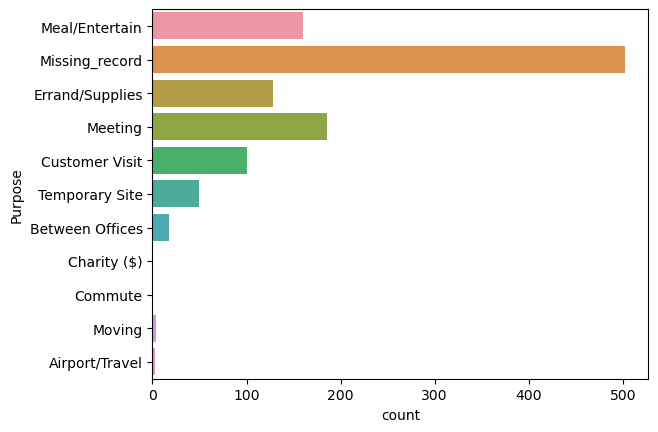

In [231]:
sns.countplot(y= 'Purpose',data = uber_data)